Lista 3

In [367]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [368]:
def random_individual(d, a, b):
    return np.array( [np.random.uniform(a, b, d), np.abs(np.random.randn(d)) ] ) #xi, sigmai

def random_population(d, n, begrange, endrange):
    P = np.zeros( (n,2,d) )
    for i in range(n):
        P[i] = random_individual(d, begrange, endrange)
    return P

def population_evaluation(P, F):
    res = np.zeros(P.shape[0])
    for i in range(len(P)):
        res[i] = F(P[i][0])
    return res

def parentselection(P, E, n):
    return P[np.argsort(E)[:n]]

def mutation(P, t, t0, d):
    newP = np.zeros(P.shape)
    for i in range(len(P)):
        newP[i][1] = P[i][1] * np.exp( t * np.random.randn(d) + t0 * np.random.randn() )
        newP[i][0] = P[i][0] + ( newP[i][1] * np.random.randn(d) )
    return newP

def mutation2(P, offspringcount, t, t0, d):
    newP = np.zeros( (offspringcount,2,d) )
    for i in range(offspringcount):
        idx = np.random.choice( P.shape[0] )
        newP[i][1] = P[idx][1] * np.exp( t * np.random.randn(d) + t0 * np.random.randn() )
        newP[i][0] = P[idx][0] + ( newP[i][1] * np.random.randn(d) )
    return newP

def replacement(A, B, evalfunc, n):
    C = np.concatenate((A, B), axis=0)
    evalsortarg = np.argsort(population_evaluation(C, evalfunc))
    return C[evalsortarg[:n]]

def replacement2(A, evalfunc, n):
    evalsortarg = np.argsort(population_evaluation(A, evalfunc))
    return A[evalsortarg[:n]]

def restrictdomain(P, beg, end):
    newP = P.copy()
    for i in range(P.shape[0]):
        newP[i][0] = np.clip( P[i][0], beg, end )
    return newP

In [369]:
def griewank(v):
    n = v.shape[0]
    res = 1
    res += 0.00025 * np.sum(v * v)
    res -= np.prod( np.cos( v / np.sqrt( np.fromiter( (i + 1 for i in range(n)), dtype=np.float64 ) ) ) )
    return res

def rastrigin(v):
    n = v.shape[0]
    A = 10
    res = A * n + np.sum( v * v ) - np.sum( A * np.cos( 2 * np.pi * v ) )
    return res

def schwefel(v):
    n = v.shape[0]
    res = 418.9820 * n - np.sum( v * np.sin( np.sqrt( np.abs( v ) ) ) )
    return res

def zakharov(v):
    n = v.shape[0]
    s = np.sum(0.5 * v * np.fromiter( (i + 1 for i in range(n)), dtype=np.float64 ))
    return np.sum(v ** 2) + s ** 2 + s ** 4

def trid(v):
    n = v.shape[0]
    res = np.sum( (v - 1) ** 2 )
    for i in range(1, n):
        res -= v[i] * v[i-1]
    return res

def sumsquares(v):
    n = v.shape[0]
    return np.sum( (v ** 2)*  np.fromiter( (i + 1 for i in range(n)), dtype=np.float64 ) )

def sphere(v):
    return np.sum( v ** 2 )


In [370]:
def ES(d, evalfunc, parentcount, offspringcount, tau, tau0, begrange, endrange, iterations = 1000):
    POP = random_population(d, parentcount, begrange, endrange)
    iterationcounter = 0
    bestreshist = np.zeros( (3, iterations) )
    while iterationcounter < iterations:
        E = population_evaluation(POP, evalfunc)
        bestidx = E.argmin()
        bestind = POP[bestidx]
        bestres = E[bestidx]
        bestreshist[0][iterationcounter] = bestres
        bestreshist[1][iterationcounter] = E.mean()
        bestreshist[2][iterationcounter] = E.max()
        
        OFF = parentselection(POP, E, offspringcount) #parents
        OFF = mutation2(OFF, offspringcount, tau, tau0, d)
        OFF = restrictdomain(OFF, begrange, endrange)
        POP = replacement(POP, OFF, evalfunc, parentcount)

        if iterationcounter % 100 == 0:
            print(iterationcounter)
            print("best result: ", bestres)
        
        iterationcounter += 1

    return bestind, bestres, bestreshist

def ES2(d, evalfunc, parentcount, offspringcount, tau, tau0, begrange, endrange, iterations = 1000):
    POP = random_population(d, parentcount, begrange, endrange)
    iterationcounter = 0
    bestreshist = np.zeros( (3, iterations) )
    while iterationcounter < iterations:
        E = population_evaluation(POP, evalfunc)
        bestidx = E.argmin()
        bestind = POP[bestidx]
        bestres = E[bestidx]
        bestreshist[0][iterationcounter] = bestres
        bestreshist[1][iterationcounter] = E.mean()
        bestreshist[2][iterationcounter] = E.max()
        
        #OFF = parentselection(POP, E, offspringcount) #parents
        OFF = mutation2(POP, offspringcount, tau, tau0, d)
        OFF = restrictdomain(OFF, begrange, endrange)
        POP = replacement2(OFF, evalfunc, parentcount)

        if iterationcounter % 50 == 0:
            print(iterationcounter)
            #print("best individualL ", bestind)
            print("best result: ", bestres)
        
        iterationcounter += 1

    return bestind, bestres, bestreshist


    

In [371]:
def makeplots(plotdata):
    plt.plot(plotdata[0], label='min')
    plt.plot(plotdata[1], label='mean')
    plt.plot(plotdata[2], label='max')
    plt.yscale('log')
    plt.legend()
    plt.show()

0
best result:  2255.7107936553593
100
best result:  1960.3419605135025
200
best result:  1333.8084303453634
300
best result:  713.8393987131873
400
best result:  452.1877351985615
500
best result:  294.50558585557235
600
best result:  209.63795412858116
700
best result:  167.45129393787394
800
best result:  139.46260780769987
900
best result:  120.44096962827136
1000
best result:  107.43410313108132
1100
best result:  99.0811792698339
1200
best result:  93.52522756416526
1300
best result:  89.13315358978281
1400
best result:  85.78612684861122


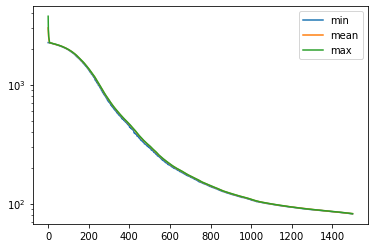

best result: 82.11591766175191


In [372]:
dimgriewank = 100
learngriewank = 0.1
taugriewank = learngriewank / np.sqrt( 2 * dimgriewank )
tau0griewank = learngriewank / np.sqrt( 2 * np.sqrt( dimgriewank ) )
bestindgriewank, bestresgriewank, bestreshistgriewank = ES( dimgriewank, griewank, 1000, 2000, taugriewank, tau0griewank, -600, 600, iterations=1500 )

makeplots( bestreshistgriewank )
print("best result:", bestresgriewank)


0
best result:  87.97922403726699
100
best result:  18.42780770440314
200
best result:  0.48321857966753023
300
best result:  0.3510015625330404
400
best result:  0.2070352115090648
500
best result:  0.2070352115090648
600
best result:  0.2070352115090648
700
best result:  0.1307993113351691
800
best result:  0.03211727657988772
900
best result:  0.024926255718384693
1000
best result:  0.02460165768822775
1100
best result:  0.024591647152729212
1200
best result:  0.02459052433002984
1300
best result:  0.024590451621272602
1400
best result:  0.024590439244296824


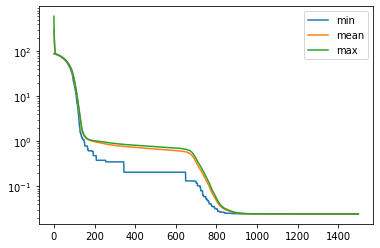

best result: 0.024590437602695192


In [399]:
dimgriewank = 10
learngriewank = 0.1
taugriewank = learngriewank / np.sqrt( 2 * dimgriewank )
tau0griewank = learngriewank / np.sqrt( 2 * np.sqrt( dimgriewank ) )
bestindgriewank, bestresgriewank, bestreshistgriewank = ES( dimgriewank, griewank, 1000, 2000, taugriewank, tau0griewank, -600, 600, iterations=1500 )

makeplots( bestreshistgriewank )
print("best result:", bestresgriewank)

0
best result:  86.82643701013981
50
best result:  24.449077567553545
100
best result:  11.50882615334416
150
best result:  11.12972760059398
200
best result:  11.078455750101213
250
best result:  11.037168186809424
300
best result:  10.98285697947459
350
best result:  10.945029915679939
400
best result:  10.94454149860151
450
best result:  10.94453960629005
500
best result:  10.944539553231749
550
best result:  10.944539552398993
600
best result:  10.94453955238815
650
best result:  10.944539552388036
700
best result:  10.944539552388022
750
best result:  10.944539552388022
800
best result:  10.944539552388022
850
best result:  10.944539552388022
900
best result:  10.944539552388022
950
best result:  10.944539552388022
1000
best result:  10.944539552388022
1050
best result:  10.944539552388022
1100
best result:  10.944539552388022
1150
best result:  10.944539552388022
1200
best result:  10.944539552388022
1250
best result:  10.944539552388022
1300
best result:  10.944539552388022
1350

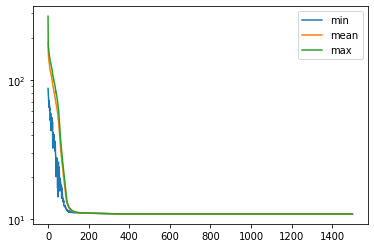

best result: 10.944539552388022


In [373]:
dimrastrigin = 10
learnrastrigin = 0.2
taurastrigin = learnrastrigin / np.sqrt( 2 * dimrastrigin )
tau0rastrigin = learnrastrigin / np.sqrt( 2 * np.sqrt( dimrastrigin ) )
bestindrastrigin, bestresrastrigin, bestreshistrastrigin = ES2( dimrastrigin, rastrigin, 1000, 2000, taurastrigin, tau0rastrigin, -5.12, 5.12, iterations=1500 )

makeplots( bestreshistrastrigin )
print("best result:", bestresrastrigin)

0
best result:  128.5577354683753
100
best result:  0.9493954684053166
200
best result:  0.29304319997710004
300
best result:  0.13727964159969552
400
best result:  0.06937621891207067
500
best result:  0.04528683760891635
600
best result:  0.015707559915764984
700
best result:  0.0027707540997553683
800
best result:  0.00028797156215142473
900
best result:  3.910167147057606e-05


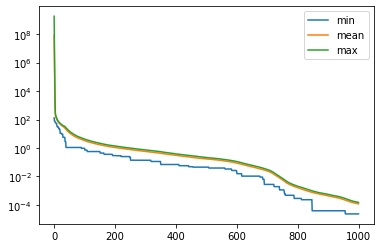

best result: 2.3520011321649617e-05


In [374]:
dimzakharov = 10
learnzakharov = 0.1
tauzakharov = learnzakharov / np.sqrt( 2 * dimzakharov )
tau0zakharov = learnzakharov / np.sqrt( 2 * np.sqrt( dimzakharov ) )
bestindzakharov, bestreszakharov, bestreshistzakharov = ES( dimzakharov, zakharov, 1000, 2000, tauzakharov, tau0zakharov, -5, 10, iterations=1000 )

makeplots( bestreshistzakharov )
print("best result:", bestreszakharov)

0
best result:  4650.411002944355
50
best result:  674.7823421078016
100
best result:  118.97736917724609
150
best result:  -106.62870634828553
200
best result:  -152.19650807265302
250
best result:  -171.3734091133635
300
best result:  -189.23969286593265
350
best result:  -202.00263761358678
400
best result:  -208.13561033043908
450
best result:  -209.57174871063347
500
best result:  -209.88756786474772
550
best result:  -209.96553708851212
600
best result:  -209.98421448408754
650
best result:  -209.99407857988507
700
best result:  -209.99832168645207
750
best result:  -209.9996038055867
800
best result:  -209.99997214191376
850
best result:  -209.99999458555405
900
best result:  -209.99999914778246
950
best result:  -209.99999988601198


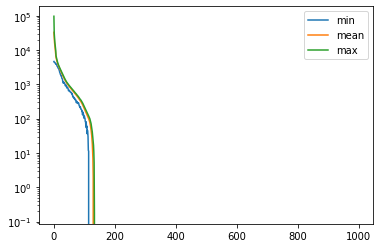

best result: -209.99999998758057


In [375]:
dimtrid = 10
learntrid = 0.1
tautrid = learntrid / np.sqrt( 2 * dimtrid )
tau0trid = learntrid / np.sqrt( 2 * np.sqrt( dimtrid ) )
bestindtrid, bestrestrid, bestreshisttrid = ES2( dimtrid, trid, 1000, 2000, tautrid, tau0trid, -(dimtrid ** 2), dimtrid ** 2, iterations=1000 )

makeplots( bestreshisttrid )
print("best result:", bestrestrid)

0
best result:  503.86812819064414
100
best result:  1.2005665494232853
200
best result:  0.6279114923675461
300
best result:  0.3739409876616606
400
best result:  0.18911914718680228
500
best result:  0.06333384332374095
600
best result:  0.004174595698316495
700
best result:  1.6868082093592722e-05
800
best result:  5.481196676587237e-07
900
best result:  1.4472605757054143e-07
1000
best result:  5.51363375603855e-09
1100
best result:  6.079446678263399e-10
1200
best result:  1.1160247560575646e-10
1300
best result:  1.3147284305860935e-11
1400
best result:  1.2000381754244072e-12


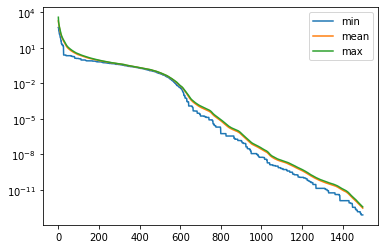

best result: 7.525112984505915e-14


In [376]:
dimsumsquares = 10
learnsumsquares = 0.1
tausumsquares = learnsumsquares / np.sqrt( 2 * dimsumsquares )
tau0sumsquares = learnsumsquares / np.sqrt( 2 * np.sqrt( dimsumsquares ) )
bestindsumsquares, bestressumsquares, bestreshistsumsquares = ES( dimsumsquares, sumsquares, 1000, 2000, tausumsquares, tau0sumsquares, -10, 10, iterations=1500 )

makeplots( bestreshistsumsquares )
print("best result:", bestressumsquares)

0
best result:  25.44126890308412
100
best result:  0.03483523108195341
200
best result:  0.006718760140928234
300
best result:  0.00087712025266407
400
best result:  0.00023573854375816074
500
best result:  3.365047039177578e-05
600
best result:  3.1488783268385537e-06
700
best result:  2.7985248543247133e-07
800
best result:  1.4646268484278379e-08
900
best result:  1.4091891530002483e-09


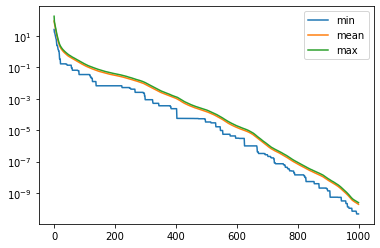

best result: 4.8453534310664645e-11


In [377]:
dimsphere = 10
learnsphere = 0.1
tausphere = learnsphere / np.sqrt( 2 * dimsphere )
tau0sphere = learnsphere / np.sqrt( 2 * np.sqrt( dimsphere ) )
bestindsphere, bestressphere, bestreshistsphere = ES( dimsphere, sphere, 1000, 2000, tausphere, tau0sphere, -5.12, 5.12, iterations=1000 )

makeplots( bestreshistsphere )
print("best result:", bestressphere)

In [395]:
INF = 1000000

def ESconstrained(d, evalfunc, parentcount, offspringcount, tau, tau0, begrange, endrange, iterations = 1000):
    POP = random_population(d, parentcount, begrange, endrange)
    iterationcounter = 0
    bestreshist = np.zeros( (3, iterations) )
    while iterationcounter < iterations:
        E = population_evaluation(POP, evalfunc)
        bestidx = E.argmin()
        bestind = POP[bestidx]
        bestres = E[bestidx]
        bestreshist[0][iterationcounter] = bestres
        bestreshist[1][iterationcounter] = E.mean()
        bestreshist[2][iterationcounter] = E.max()
        
        OFF = parentselection(POP, E, offspringcount) #parents
        OFF = mutation2(OFF, offspringcount, tau, tau0, d)
        OFF = restrictdomain(OFF, begrange, endrange)
        POP = replacement(POP, OFF, evalfunc, parentcount)

        if iterationcounter % 10 == 0:
            print(iterationcounter)
            print("best individual ", bestind)
            print("best result: ", bestres)
        
        iterationcounter += 1

    return bestind, bestres, bestreshist

def ES2constrained(d, evalfunc, parentcount, offspringcount, tau, tau0, begrange, endrange, iterations = 1000):
    POP = random_population(d, parentcount, begrange, endrange)
    iterationcounter = 0
    bestreshist = np.zeros( (3, iterations) )
    while iterationcounter < iterations:
        E = population_evaluation(POP, evalfunc)
        bestidx = E.argmin()
        bestind = POP[bestidx]
        bestres = E[bestidx]
        bestreshist[0][iterationcounter] = bestres
        bestreshist[1][iterationcounter] = E.mean()
        bestreshist[2][iterationcounter] = E.max()
        
        #OFF = parentselection(POP, E, offspringcount) #parents
        OFF = mutation2(POP, offspringcount, tau, tau0, d)
        OFF = restrictdomain(OFF, begrange, endrange)
        POP = replacement2(OFF, evalfunc, parentcount)

        if iterationcounter % 50 == 0:
            print(iterationcounter)
            print("best individualL ", bestind)
            print("best result: ", bestres)
        
        iterationcounter += 1

    return bestind, bestres, bestreshist

In [405]:
def g10(v):
    return v[0] + v[1] + v[2]

def g10constraint1(v):
    return (-1 + 0.0025*(v[3] + v[5])) <= 0
def g10constraint2(v):
    return (-1 + 0.0025*(-v[3] + v[4] + v[6])) <= 0
def g10constraint3(v):
    return (-1 + 0.01*(-v[4] + v[7])) <= 0
def g10constraint4(v):
    return (100 * v[0] - v[0] * v[5] + 833.33252 * v[3] - 83333.333) <= 0
def g10constraint5(v):
    return (v[1] * v[3] - v[1] * v[6] - 1250 * v[3] + 1250 * v[4]) <= 0
def g10constraint6(v):
    return (v[2] * v[4] - v[2] * v[7] - 2500 * v[4] + 1250000) <= 0

def g1(v):
    res = 5 * np.sum( v[0:3] ) - 5 * np.sum( v[0:3] ** 2 ) - np.sum( v[4:12] )
    if( 2 * v[0] + 2 * v[1] + v[9] + v[10] - 10 > 0 ):
        res = INF
    if( 2 * v[0] + 2 * v[2] + v[9] + v[11] - 10 > 0 ):
        res = INF
    if( 2 * v[1] + 2 * v[2] + v[10] + v[12] - 10 > 0 ):
        res = INF
    if( -8 * v[0] + v[9] > 0 ):
        res = INF
    if( -8 * v[1] + v[10] > 0 ):
        res = INF
    if( -8 * v[2] + v[11] > 0 ):
        res = INF
    if( -2 * v[3] - v[4] + v[9] > 0):
        res = INF
    if( -2 * v[5] - v[6] + v[10] > 0):
        res = INF
    if( -2 * v[7] - v[8] + v[11] > 0):
        res = INF
    for i in range(1, 13):
        if( v[i] < 0 ):
            res = INF
    for i in range(1, 9):
        if( v[i] > 1 ):
            res = INF
    if( v[12] > 1 ):
        res = INF
    return res

def g2(v):
    n = v.shape[0]
    g = np.sum( np.cos( v ) ** 4 ) - 2 * np.prod( np.cos( v ) ** 2 )
    d = np.sum( (v ** 2) * np.fromiter( (i + 1 for i in range(n)), dtype=np.float64 ) )
    res = np.abs( g / d )
    if( - np.prod(v) + 0.75 > 0 ):
        res = INF
    if( np.sum(v) - 7.5 * n > 0 ):
        res = INF
    return INF

def g6(v):
    res = (v[0] - 10) ** 3 + (v[1] - 20) ** 3
    if( (v[0] - 5) ** 2 + (v[1] - 5) ** 2 + 100 > 0 ):
        res = INF
    if( (v[0] - 5) ** 2 + (v[1] - 5) ** 2 - 82.81 > 0):
        res = INF
    return res

def g12(v):
    res = 1 - 0.01*( (v[0] - 5) ** 2 + (v[1] - 5) ** 2 + (v[2] - 5) ** 2 )
    for i in range(1, 10):
        for j in range(1, 10):
            for k in range(1, 10):
                if( (v[0] - i) ** 2 + (v[1] - j) ** 2 + (v[2] - k) ** 2 - 0.0625 > 0 ):
                    res = INF
    return res

0
best individualL  [[9.94052149e+00 8.10590700e+01 2.88226582e+00 4.47738443e+01
  2.78541048e+01 4.75529912e+01 8.30271526e+01 6.38642730e+01
  1.84659316e+00 3.45682398e+01 2.32686142e+01 5.85348778e+01
  8.03725319e+01]
 [4.50873861e-01 6.68469148e-01 1.13640413e+00 3.26380141e-01
  5.57989988e-02 4.54088836e-02 1.23525301e+00 7.20594183e-01
  3.43484157e-01 1.71082898e+00 2.54783796e-01 9.40259083e-02
  5.76532532e-02]]
best result:  1000000.0
50
best individualL  [[75.73252448 72.82845566 70.94314658 52.31969796 69.32109335 23.45641077
   8.63860772 51.88226074 43.9777897  19.98599039  1.         88.45000836
  65.5873137 ]
 [ 0.59484931  1.27197696  1.16251624  0.97166638  0.74880915  0.69173003
   0.6412621   1.63510581  0.22506547  0.13717125  1.90201474  0.1809115
   0.52781519]]
best result:  1000000.0
100
best individualL  [[80.32331279  6.8315343  39.42310228 90.85367928 28.37400923 71.99454523
  71.30609195  5.78001033 97.06894707  3.91661749  9.18758879 57.09041666
  63.8

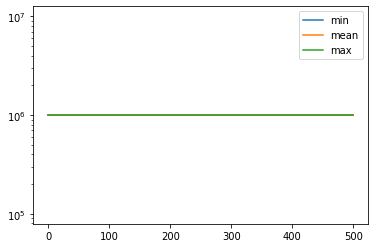

In [401]:
dimg1 = 13
learng1 = 0.1
taug1 = learng1 / np.sqrt( 2 * dimg1 )
tau0g1 = learng1 / np.sqrt( 2 * np.sqrt( dimg1 ) )
bestindg1, bestresg1, bestreshistg1 = ES2constrained( dimg1, g1, 3000, 3000, taug1, tau0g1, 1, 100, iterations=500 )

makeplots( bestreshistg1 )

0
best individualL  [[2.50050006e+00 6.98407387e+00 4.63683535e+00 4.03073594e-02
  2.12093848e+00 3.91830278e+00 5.10300091e+00 9.59047624e+00
  4.27809195e+00 9.91618919e-01]
 [6.79501152e-01 6.62739672e-03 2.53754200e-01 2.46867070e+00
  9.62821452e-01 4.65420753e-02 9.34475026e-01 5.95627433e-01
  1.14672938e+00 4.92792261e-02]]
best result:  1000000.0
50
best individualL  [[ 7.70458588  5.05452424 10.          7.23908699  8.33165747  9.7049236
   1.9746567   8.7258254   7.23341564  0.86307279]
 [ 1.28660202  0.43092876  3.40581805  1.01499559  0.24329354  2.04504672
   0.6644788   0.17087035  0.82684559  0.16080575]]
best result:  1000000.0
100
best individualL  [[4.62226578 5.1532892  5.81950584 7.41008002 1.49089663 1.31054957
  4.97644865 2.4307024  6.94777414 8.92330709]
 [0.44654983 0.7607969  0.49416159 0.80481759 1.7076131  2.61441983
  0.78244827 0.01012755 1.25142545 0.45774948]]
best result:  1000000.0
150
best individualL  [[3.31263664 4.17154975 2.01002197 7.39018883 6

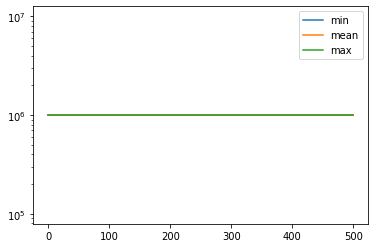

In [402]:
dimg2 = 10
learng2 = 0.1
taug2 = learng2 / np.sqrt( 2 * dimg2 )
tau0g2 = learng2 / np.sqrt( 2 * np.sqrt( dimg2 ) )
bestindg2, bestresg2, bestreshistg2 = ES2constrained( dimg2, g2, 3000, 3000, taug2, tau0g2, 0, 10, iterations=500 )

makeplots( bestreshistg2 )

0
best individualL  [[31.10310189 72.27639477]
 [ 1.18728667  0.36914144]]
best result:  1000000.0
50
best individualL  [[55.58033233  3.55393837]
 [ 1.9940595   0.97141709]]
best result:  1000000.0
100
best individualL  [[ 5.30954154 33.93996436]
 [ 0.21905129  0.17551734]]
best result:  1000000.0
150
best individualL  [[33.04926499 22.20478175]
 [ 1.40228066  5.5948143 ]]
best result:  1000000.0
200
best individualL  [[27.35413676 61.9100649 ]
 [ 0.51391212  1.06362631]]
best result:  1000000.0
250
best individualL  [[43.83886174 29.68386168]
 [ 1.00525011  0.51231975]]
best result:  1000000.0
300
best individualL  [[31.48780659 53.05621231]
 [ 1.14361021  1.68235544]]
best result:  1000000.0
350
best individualL  [[ 8.57924015 65.83511409]
 [ 2.68554286  2.59046471]]
best result:  1000000.0
400
best individualL  [[ 7.02442601 53.62399293]
 [ 0.51526304  0.14299725]]
best result:  1000000.0
450
best individualL  [[7.80397575e+01 4.83353579e+01]
 [2.51734889e-02 1.11379699e+00]]
best 

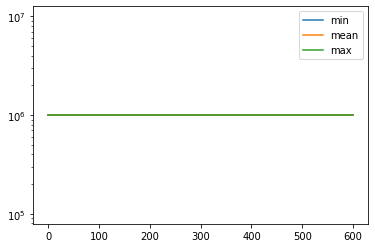

In [403]:
dimg6 = 2
learng6 = 0.1
taug6 = learng6 / np.sqrt( 2 * dimg6 )
tau0g6 = learng6 / np.sqrt( 2 * np.sqrt( dimg6 ) )
bestindg6, bestresg6, bestreshistg6 = ES2constrained( dimg6, g6, 2000, 3000, taug6, tau0g6, 0, 100, iterations=600 )

makeplots( bestreshistg6 )

In [407]:
dimg12 = 3
learng12 = 0.1
taug12 = learng12 / np.sqrt( 2 * dimg12 )
tau0g12 = learng12 / np.sqrt( 2 * np.sqrt( dimg12 ) )
bestindg12, bestresg12, bestreshistg12 = ES2constrained( dimg12, g12, 3000, 3000, taug12, tau0g12, 0, 10, iterations=100 )

makeplots( bestreshistg12 )

0
best individualL  [[5.1027448  4.38945374 8.45541547]
 [0.69509782 0.36235768 0.49209974]]
best result:  1000000.0


KeyboardInterrupt: 